In [1]:
STATISTICS_MINI_PROJECT

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams['figure.figsize']=(12,6)
plt.style.use('fivethirtyeight')

In [74]:
df=pd.read_csv('fifa_stats.csv')
df.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2000 non-null   object 
 1   Age                       2000 non-null   int64  
 2   Nationality               2000 non-null   object 
 3   Overall_rating            2000 non-null   int64  
 4   Potential                 2000 non-null   int64  
 5   Club                      1981 non-null   object 
 6   Preferred Foot            2000 non-null   object 
 7   International Reputation  2000 non-null   int64  
 8   Weak Foot                 2000 non-null   int64  
 9   Skill Moves               2000 non-null   int64  
 10  Work Rate                 2000 non-null   object 
 11  Position                  2000 non-null   object 
 12  Jersey Number             2000 non-null   int64  
 13  Height                    2000 non-null   float64
 14  Weight  

In [76]:
df.isnull().sum()/df.shape[0]*100

Name                        0.00
Age                         0.00
Nationality                 0.00
Overall_rating              0.00
Potential                   0.00
Club                        0.95
Preferred Foot              0.00
International Reputation    0.00
Weak Foot                   0.00
Skill Moves                 0.00
Work Rate                   0.00
Position                    0.00
Jersey Number               0.00
Height                      0.00
Weight                      0.00
dtype: float64

In [77]:
df=df.dropna()

In [78]:
df['Skill Moves']=df['Skill Moves'].astype('object')

a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

In [79]:
df_age=df['Age']
mu=df_age.mean()
sigma=df_age.std()
print('population mean',mu)
print('population standard deviation',sigma)

population mean 27.215547703180214
population standard deviation 3.8525185996930396


In [80]:
sample=np.random.choice(df_age,size=200,replace=False)

In [81]:
#mean of sample
x_bar=np.mean(sample)
print('mean of sampling distribution',x_bar)

mean of sampling distribution 27.115


In [82]:
#standard error
se=np.std(sample)/np.sqrt(len(sample))
print('standard error',se)

standard error 0.2553602846959566


In [83]:
#the standard error shows how much the sample mean deviates from population mean, the 

In [84]:
#standard error= population standard deviation/sqrt sample size
#as standard error is inversely proportional to sqrt of sample size, when we increase the sample size 
#we are getting close to population size and sample mean will try to become same value as population mean as a result standard error is decreasing 


b)	Is there any evidence that the players overall rating is greater than 80?

In [85]:
#Hypothesis:
#Ho: mu<=80, players overall rating less than or equal to 80
#Ha: mu>80,  players overall rating greater than 80

In [86]:
#normality of data
#hypothesis:
#Ho: skew=0 data normal
#Ha: skew !=0 data is not normal

#test statistics
stats.shapiro(df.Overall_rating)


ShapiroResult(statistic=0.8532959818840027, pvalue=1.721150444000814e-39)

In [87]:
#assume data is normal
#Population std not known
#one sample t test(right tail)

In [88]:
#test statistics
test_stat,two_side_pval=stats.ttest_1samp(df.Overall_rating,popmean=80)
print('test statistics',test_stat)
print('two tail probability',two_side_pval)

test statistics -24.161970492711205
two tail probability 3.0006946846662113e-113


In [89]:
pval=1-(two_side_pval/2)
print('probability',pval)

probability 1.0


In [90]:
#inference
if pval<0.05:
    print('null hypotheis rejected')
    print('there is evience that players overall rating greater than 80')
else:
    print('fail to reject null hypothesis')
    print('there is no evidence that players overall ratings greater than 80')

fail to reject null hypothesis
there is no evidence that players overall ratings greater than 80


c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

In [91]:
df['Preferred Foot'].value_counts()

Right    1519
Left      462
Name: Preferred Foot, dtype: int64

In [92]:
df_right=df[df['Preferred Foot']=='Right']['Potential']
df_left=df[df['Preferred Foot']=='Left']['Potential']

Statistical analysis

In [93]:
#Hypothesis
#Ho: mu1-mu2<=0, both right and left foot player have less than or equal potential
#Ha: mu1-mu2>0 , potential of right foot player greater than potential of left foot player

In [94]:
#checking data
#normality of data-shapiro test
#hypothesis
#Ho: skew=0
#Ha: skew!=0

#test statistics
print(stats.shapiro(df_right))
print(stats.shapiro(df_left))
#p value<0.05(significance value) Ho is rejected data is not normal

ShapiroResult(statistic=0.9373535513877869, pvalue=8.425229710834448e-25)
ShapiroResult(statistic=0.9437844157218933, pvalue=3.187897645515192e-12)


In [95]:
#Hypothesis test
#asssuming data is normal
#Population standard deviation not known
#two sample independent t test(right tail)

In [96]:
#test statistics
test_stat,two_side_pval=stats.ttest_ind(df_right,df_left)
print('test statistics value',test_stat)
print('two tail probability value',two_side_pval)

test statistics value -1.6316202307100005
two tail probability value 0.1029186188520214


In [97]:
#probability value
pval=1-(pval/2)
print('probability value',pval)

probability value 0.5


In [98]:
#inference
sig_val=0.05
if pval<sig_val:
    print('null hypothesis rejected')
    print('potential of right foot player greater than potential of left foot player')
else:
    print('reject nullhypothesis')
    print(' both right and left foot player have less than or equal potential')

reject nullhypothesis
 both right and left foot player have less than or equal potential


In [99]:
#preferred foot has no impact on player potential

graphical analysis

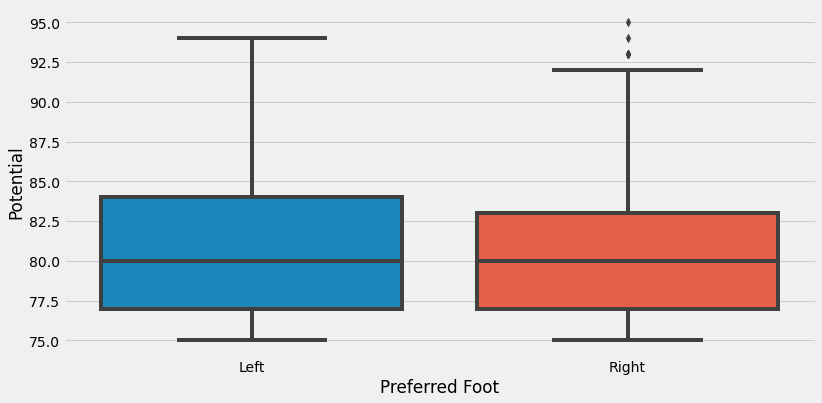

In [100]:
sns.boxplot(x=df['Preferred Foot'],y=df['Potential'])
plt.plot()
plt.show()

In [101]:
#both left and right preferred foot has more or less same median, and their IQR range is also not that much difference
#so, preferred foot has no impact on potential

d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

In [102]:
#Hypothesis formation
#Ho: corr=0, no relation between overall rating and potential
#Ha: corr!=0,   there is relation between overall rating and potential

In [103]:
#choice of test
#assume data is normal
#population standard deviation not known
#Pearson correlation test

In [104]:
#test statistics
test_stat,pval=stats.pearsonr(df.Overall_rating,df.Potential)
print('test statistics value',test_stat)
print('probability value to make Ho true for given sample parameter',pval)

test statistics value 0.7320858358909884
probability value to make Ho true for given sample parameter 0.0


In [105]:
#inference
sig_val=0.05
if pval<sig_val:
    print('null hypothesis rejected')
    print('there is relation between overall rating and potential')
else:
    print('fail to reject null hypothesis')
    print('no relation between overall rating and potential')

null hypothesis rejected
there is relation between overall rating and potential


e)	Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.

In [106]:
df_1=df[df['Skill Moves']==1]['Overall_rating']
df_2=df[df['Skill Moves']==2]['Overall_rating']
df_3=df[df['Skill Moves']==3]['Overall_rating']
df_4=df[df['Skill Moves']==4]['Overall_rating']
df_5=df[df['Skill Moves']==5]['Overall_rating']

In [107]:
#Hypothesis
#Ho: all overall rating mean are equal,             skill move have no effect in overall rating
#Ha: atleast one overall rating mean is different,  skill move have effect in overall rating

In [108]:
#data normality-shapiro
#hypothesis
#Ho: skew=0 data normal
#Ha: skew !=0, data is not normal

#test statistics
print(stats.shapiro(df.Overall_rating))
#pvalue <0.05significance value , data is not normal

ShapiroResult(statistic=0.8532959818840027, pvalue=1.721150444000814e-39)


In [109]:
#equality of variance--levene test
# Ho : All variance are equal
# Ha : At least one variance is not equal

#test statistics
print(stats.levene(df_1,df_2,df_3,df_4,df_5))

LeveneResult(statistic=9.804649031105178, pvalue=7.467011515280531e-08)


In [110]:
test_stat,pval=stats.f_oneway(df_1,df_2,df_3,df_4,df_5)
print('test statistics',test_stat)
print('probability value',pval)

test statistics 30.65461769112108
probability value 8.630701393554627e-25


In [111]:
#inference
if pval<0.05:
    print('null hypothesis rejected')
    print('there is relation between skill moves and overall rating')
else:
    print('fail to reject null hypothesis')
    print('there is no relation between skill moves and overall rating')

null hypothesis rejected
there is relation between skill moves and overall rating


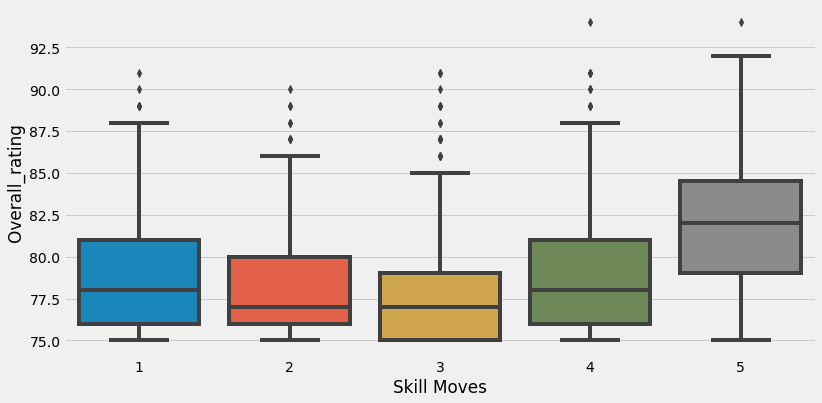

In [112]:
sns.boxplot(x=df['Skill Moves'],y=df['Overall_rating'])
plt.show()

In [113]:
#from chart we can understand skill moves 4 and 5 have higher overall rating than other skill moves,
#so the player with high skill will have higher overall rating


In [114]:
df1=pd.read_csv('phone.csv')
df1.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [115]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


In [116]:
df1.isnull().sum()

date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.

In [117]:
df1['network'].value_counts()

Vodafone     215
Three        215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
Name: network, dtype: int64

In [118]:
df_vodafone=df1[df1['network']=='Vodafone']['duration']
df_three=df1[df1['network']=='Three']['duration']
df_data=df1[df1['network']=='data']['duration']
df_meteor=df1[df1['network']=='Meteor']['duration']
df_tesco=df1[df1['network']=='Tesco']['duration']
df_landline=df1[df1['network']=='landline']['duration']
df_voicemail=df1[df1['network']=='voicemail']['duration']

In [119]:
#assuming data as normal
#Population std not known

In [120]:
#confidence interval 
CI_vodafone=stats.t.interval(loc=df_vodafone.mean(),scale=df_vodafone.std()/np.sqrt(len(df_vodafone)),alpha=0.95,df=len(df_vodafone)-1)
CI_three=stats.t.interval(loc=df_three.mean(),scale=df_three.std()/np.sqrt(len(df_three)),alpha=0.95,df=len(df_three)-1)
CI_data=stats.t.interval(loc=df_data.mean(),scale=df_data.std()/np.sqrt(len(df_data)),alpha=0.95,df=len(df_data)-1)
CI_meteor=stats.t.interval(loc=df_meteor.mean(),scale=df_meteor.std()/np.sqrt(len(df_meteor)),alpha=0.95,df=len(df_meteor)-1)
CI_tesco=stats.t.interval(loc=df_tesco.mean(),scale=df_tesco.std()/np.sqrt(len(df_tesco)),alpha=0.95,df=len(df_tesco)-1)
CI_landline=stats.t.interval(loc=df_landline.mean(),scale=df_landline.std()/np.sqrt(len(df_landline)),alpha=0.95,df=len(df_landline)-1)
CI_voicemail=stats.t.interval(loc=df_voicemail.mean(),scale=df_voicemail.std()/np.sqrt(len(df_voicemail)),alpha=0.95,df=len(df_voicemail)-1)

In [121]:
#confidence interval with 95% confidence
print("range estimate of average duration calls made by vodafone network",CI_vodafone)
print("range estimate of average duration calls made by three network",CI_three)
print("range estimate of average duration calls made by data network",CI_data)
print("range estimate of average duration calls made by meteor network",CI_meteor)
print("range estimate of average duration calls made by tesco network",CI_tesco)
print("range estimate of average duration calls made by landline network",CI_landline)
print("range estimate of average duration calls made by voicemail network",CI_voicemail)

range estimate of average duration calls made by vodafone network (143.2999143622583, 155.91262913364878)
range estimate of average duration calls made by three network (135.44301125172115, 147.4728708673856)
range estimate of average duration calls made by data network (134.28632285019395, 147.6509627040725)
range estimate of average duration calls made by meteor network (129.7641544553564, 149.7498689167357)
range estimate of average duration calls made by tesco network (135.0471063622705, 155.52790157130093)
range estimate of average duration calls made by landline network (127.19627298930664, 156.03900893712205)
range estimate of average duration calls made by voicemail network (137.77804893297514, 180.3696339210989)


In [122]:
#confidence interval
CI_vodafone=stats.t.interval(loc=df_vodafone.mean(),scale=df_vodafone.std()/np.sqrt(len(df_vodafone)),alpha=0.99,df=len(df_vodafone)-1)
CI_three=stats.t.interval(loc=df_three.mean(),scale=df_three.std()/np.sqrt(len(df_three)),alpha=0.99,df=len(df_three)-1)
CI_data=stats.t.interval(loc=df_data.mean(),scale=df_data.std()/np.sqrt(len(df_data)),alpha=0.99,df=len(df_data)-1)
CI_meteor=stats.t.interval(loc=df_meteor.mean(),scale=df_meteor.std()/np.sqrt(len(df_meteor)),alpha=0.99,df=len(df_meteor)-1)
CI_tesco=stats.t.interval(loc=df_tesco.mean(),scale=df_tesco.std()/np.sqrt(len(df_tesco)),alpha=0.99,df=len(df_tesco)-1)
CI_landline=stats.t.interval(loc=df_landline.mean(),scale=df_landline.std()/np.sqrt(len(df_landline)),alpha=0.95,df=len(df_landline)-1)
CI_voicemail=stats.t.interval(loc=df_voicemail.mean(),scale=df_voicemail.std()/np.sqrt(len(df_voicemail)),alpha=0.99,df=len(df_voicemail)-1)

In [123]:
#confidence interval with 99% confidence
print("range estimate of average duration calls made by vodafone network",CI_vodafone)
print("range estimate of average duration calls made by three network",CI_three)
print("range estimate of average duration calls made by data network",CI_data)
print("range estimate of average duration calls made by meteor network",CI_meteor)
print("range estimate of average duration calls made by tesco network",CI_tesco)
print("range estimate of average duration calls made by landline network",CI_landline)
print("range estimate of average duration calls made by voicemail network",CI_voicemail)

range estimate of average duration calls made by vodafone network (141.29105865289594, 157.92148484301114)
range estimate of average duration calls made by three network (133.5269882059474, 149.38889391315936)
range estimate of average duration calls made by data network (132.14496901015443, 149.79231654411203)
range estimate of average duration calls made by meteor network (126.51547309539654, 152.99855027669554)
range estimate of average duration calls made by tesco network (131.71384372861525, 158.8611642049562)
range estimate of average duration calls made by landline network (127.19627298930664, 156.03900893712205)
range estimate of average duration calls made by voicemail network (130.28567279780262, 187.86201005627143)


In [124]:
#voice mail network duration range is wider than any other network in both 95% and 99% confidence interval

b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

In [125]:
df1.network.value_counts()

Vodafone     215
Three        215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
Name: network, dtype: int64

In [126]:
df1.network

0          data
1      Vodafone
2        Meteor
3         Tesco
4         Tesco
         ...   
815        data
816        data
817        data
818    Vodafone
819        data
Name: network, Length: 820, dtype: object

In [127]:
#Ho: obs=exp  (all network are in equal proportion)
#Ha: obs!=exp  (there is unequalin proportion)

In [128]:
#hypothesis test
#categorical data
#chisquare test

In [129]:
#test statistics
test_stat,pval=stats.chisquare(f_obs=[215,215,150,87,84,42,27],f_exp=[len(df1)/7])
print('test statistics',test_stat)
print('probability value',pval)

test statistics 307.409756097561
probability value 2.112592760257685e-63


In [130]:
#inference
if pval<0.05:
    print('null hypothesis rejected')
    print('there is unequal in proportion')
else:
    print('fail to reject null hypothesis')
    print('all network are in equal proportion')

null hypothesis rejected
there is unequal in proportion


c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.

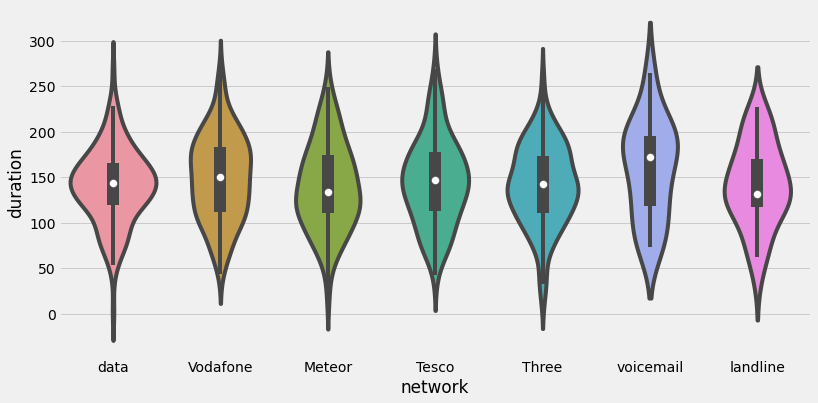

In [131]:
sns.violinplot(y=df1.duration,x=df1.network)
plt.show()

In [132]:
# median duration value of voicemail network is higher than any other network
# data network has more dispersion in duration and has high duration value
# there is presence of outliers in all network
# IQR range is high for vodafone and voicemail network

d)	Perform statistical tests to identify the relation between item and duration. Detailed 
explanation of relation between the classes is required.


In [61]:
df_call=df1[df1.item=='call']['duration']
df_sms=df1[df1.item=='sms']['duration']
df_data=df1[df1.item=='data']['duration']

In [62]:
#hypothesis:
#Ho: all mean are equal,            no relation between item and duration
#Ha: atleast one mean is different, there is relation between item and duration

In [63]:
#checking data normality--shapiro
#hypothesis
#Ho: skew=0 data is normal
#Ha: skew!=0 data is not normal

#test statistics
print(stats.shapiro(df_call))
print(stats.shapiro(df_sms))
print(stats.shapiro(df_data))
#pvalues >0.05 significance level the data sets are normal

ShapiroResult(statistic=0.9973042011260986, pvalue=0.7803382277488708)
ShapiroResult(statistic=0.9943404197692871, pvalue=0.37839275598526)
ShapiroResult(statistic=0.9912639856338501, pvalue=0.48521795868873596)


In [64]:
#equality of variance -- levene test
#Hypothesis:
#Ho: all variance are equal
#Ha: variance not equal

#test statistics
print(stats.levene(df_call,df_sms,df_data))
#pvalue<0.05, variance are not equal

LeveneResult(statistic=3.4300976447008478, pvalue=0.03285087780533987)


In [65]:
#hypothesis test
#data is normal
#assuming variance are equal
#one way annova test

In [66]:
#test statistics
test_stat,pval=stats.f_oneway(df_call,df_sms,df_data)
print('test statistics',test_stat)
print('probability',pval)

test statistics 1.9313964906864995
probability 0.1456068656611744


In [67]:
#inference
sig_val=0.05
if pval<0.05:
    print('null hypothesis rejected')
    print('there is relation between item and duration')
else:
    print('fail to reject null hypothesis')
    print('no relation between item and duration')

fail to reject null hypothesis
no relation between item and duration


e)	Perform statistical tests to identify the relation between network and network_type. 

In [68]:
obs=pd.crosstab(df1.network_type,df1.network)
obs

network,Meteor,Tesco,Three,Vodafone,data,landline,voicemail
network_type,,,,,,,
data,0,0,0,0,150,0,0
landline,0,0,0,0,0,42,0
mobile,87,84,215,215,0,0,0
voicemail,0,0,0,0,0,0,27


In [69]:
#Hypothesis:
#Ho: data are independent(there is no relation between network and network type)
#Ha: data are dependent (there is relation between network and network type)

In [70]:
#test of relation
#more than 2 categorical
#chisquare test of contigency

In [71]:
#test statistics
test_stat,pval,dof,exp=stats.chi2_contingency(obs)
print('test statistics value',test_stat)
print('probability value',pval)
print('degrees of freedom',pval)
print('expected outcome',exp)

test statistics value 2460.0
probability value 0.0
degrees of freedom 0.0
expected outcome [[ 15.91463415  15.36585366  39.32926829  39.32926829  27.43902439
    7.68292683   4.93902439]
 [  4.45609756   4.30243902  11.01219512  11.01219512   7.68292683
    2.15121951   1.38292683]
 [ 63.76463415  61.56585366 157.57926829 157.57926829 109.93902439
   30.78292683  19.78902439]
 [  2.86463415   2.76585366   7.07926829   7.07926829   4.93902439
    1.38292683   0.88902439]]


In [72]:
#inference
sig_val=0.05
if pval<0.05:
    print('null hypothesis rejected')
    print('there is relation between network and network type')
else:
    print('fail to reject null hypothesis')
    print('there is no relation between network and network type')

null hypothesis rejected
there is relation between network and network type
